In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import utils
import os

In [142]:
# set directory
path = os.getcwd()

# get dataframe
df, target, _ = utils.get_data()

In [143]:
# load model metrics
metrics_df = pd.read_csv('zero_to_one_MinMaxScaler_metrics.csv', sep=';', index_col=0)
metrics_df.sort_values('Test Score', inplace=True)
metrics_df

,Train Score,Validation Score,Test Score,Mean Absolute Error
multi_layer_gru,0.2950,1.6321,1.5885,1.1362
cnn_lstm,0.5371,4.5963,2.6877,1.4070
multi_layer_cnn,0.3657,2.2132,2.8269,1.5267
multi_layer_ff,0.4181,3.9123,3.3797,1.6396
one_layer_cnn,0.2431,3.3709,4.3466,1.9714
multi_layer_lstm,0.3132,4.2591,5.5868,2.1887
one_layer_gru,0.6051,5.7581,7.2074,2.5411
one_layer_ff,0.5740,4.8555,8.1221,2.6992
one_layer_lstm,0.3408,5.7147,10.7732,3.0900


##### NOTE: At times the data set is not updated with the macroeconomic variables from the previous month, but instead with 2 months old observations. In this case, the actual number that is the aim of the prediction is already available. This is for example the case at the time of writing this Notebook (24th of January, 2023). Unfortunately, the macroeconomic variables for the December are not yet updated, so the code provides predictions for the December CPI print (6.42% YoY), which is already available.


In [144]:
# load predictions
predictions_df = pd.read_csv('zero_to_one_MinMaxScaler_predictions.csv', sep=';', index_col=0)
predictions_df = predictions_df.reindex(metrics_df.index)
predictions_df

,Prediction
multi_layer_gru,6.213722
cnn_lstm,7.445036
multi_layer_cnn,7.559522
multi_layer_ff,7.634880
one_layer_cnn,6.491886
multi_layer_lstm,6.422878
one_layer_gru,6.466219
one_layer_ff,6.623601
one_layer_lstm,6.300375


In [145]:
# reindex target
new_index = pd.date_range(target.index[0], target.index[-1]+pd.Timedelta(days=31), freq='MS')
target = pd.Series(target).reindex(new_index, fill_value=np.nan)*100

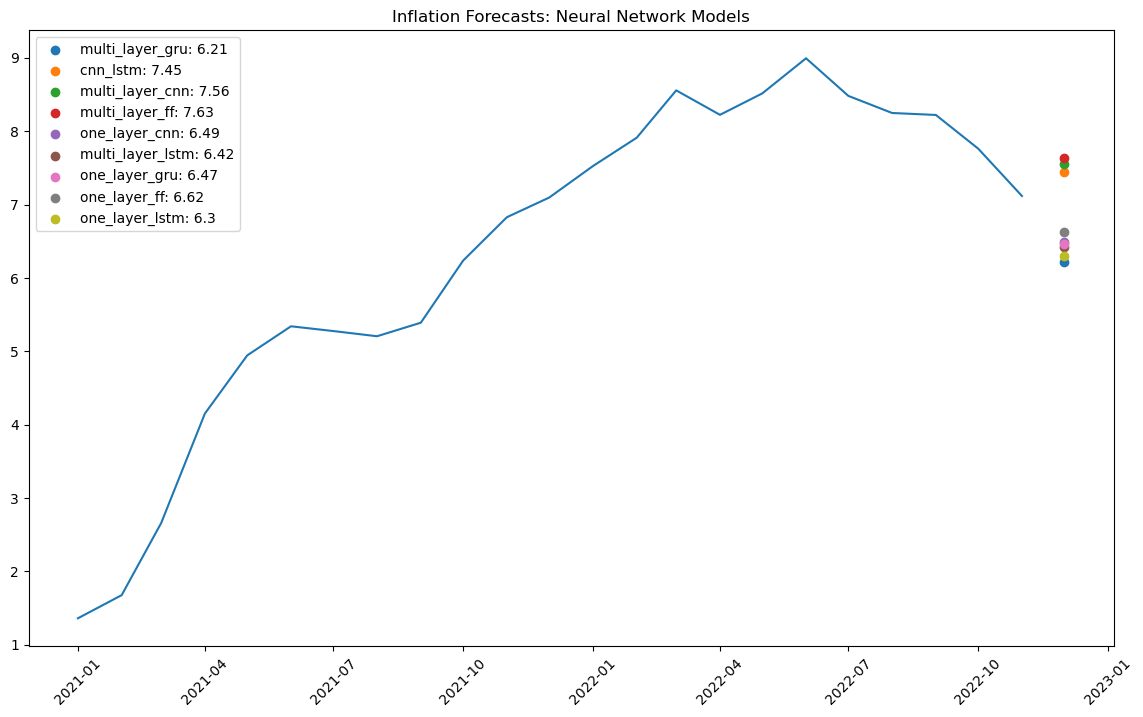

<Figure size 640x480 with 0 Axes>

In [146]:
# plot figure with target values and predictions
fig = plt.figure(figsize=(14,8))
plt.plot(target['2021-01-01':])
plt.title('Inflation Forecasts: Neural Network Models')
for i in range(len(predictions_df)):
    plt.scatter(target.index[-1], 
                predictions_df['Prediction'][i], 
                label=f"{predictions_df.index[i]}: {round(predictions_df['Prediction'][i],2)}")
plt.xticks(rotation=45)
plt.legend()
plt.show()
plt.savefig("oos_predictions", dpi=fig.dpi)

In [147]:
# ensemble forecast of top 5 models
ensemble_forecast = predictions_df.iloc[0:5].mean()
ensemble_forecast

Prediction    7.069009
dtype: float64